# House Price Study Notebook

### Objectives

* The Client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualisations of the correlated variables against the sale price.

### Inputs

* 

### Outputs

* 
* 

### Additional Comments

* 
* 

## Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ames-heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ames-heritage-housing'

## Load Data

In [4]:
import pandas as pd
df_house_prices = pd.read_csv(f"outputs/datasets/collection/house_prices_records.csv")
df_house_prices.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Correlation Study

Refer to:
Correlation Unit 02 Analysis

* We are trying to identify if there are any correlations between the variables and the Sale Price of the house.
* We will use .corr() for spearman and pearson methods, and investigate the correlations against the SalePrice variable.
* The r values below is between -1 (negative) and 1 (positive) to determine the strength of the correlation.
* With these methods we will use SalePrice values to gather correlation values and sort them by absolute (abs) values.

#### Spearman Method:

* The Spearman correlation looks at the monotonic relationship between two variables. The method ranks the values of both variables and measures the difference between the two ranks.
* Using the correlation cooefficient we will be able to determine how strong the correlation is (between -1 and 1) and in which direction the correlation is going.
* We are looking for the top 10 most correlations.

In [6]:
salesprice_corr_spearman = df_house_prices.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
salesprice_corr_spearman 

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

#### Pearson Method:

* The Pearson correlation looks at the linear relationship between two variables as they change at a constant rate, this method uses the raw data. We can measure how strong the correlation is and in which direction the correlation is going (positive, negative or no correlation).
* We are looking for the top 10 most correlations.

In [7]:
salesprice_corr_pearson = df_house_prices.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
salesprice_corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

The values are ranging between 0.3 and 0.8 which represents moderate to strong correlation levels.

We are now going to consider the top 5 correlation levels. We will convert these correlations into lists and concatenate.

In [8]:
top_n = 5
set(salesprice_corr_spearman[:top_n].index.to_list() + salesprice_corr_pearson[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Six variables were provided (this could be due to two variables having the same correlation levels). We are going to use these variables and investigate if:
HYPOTHESIS HERE

In [9]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

## EDA on selected variables

Next we are going to show the selected variables above with SalePrice:

In [10]:
df_eda = df_house_prices.filter(vars_to_study + ['SalePrice'])
df_eda.head(5)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500
3,961,642,1717,7,756,1915,140000
4,1145,836,2198,8,1145,2000,250000


Now we are going to distribute it by SalesPrice:

# EDIT

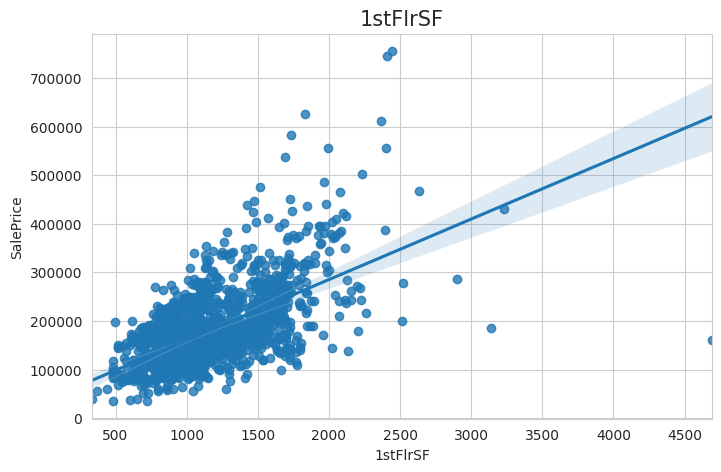

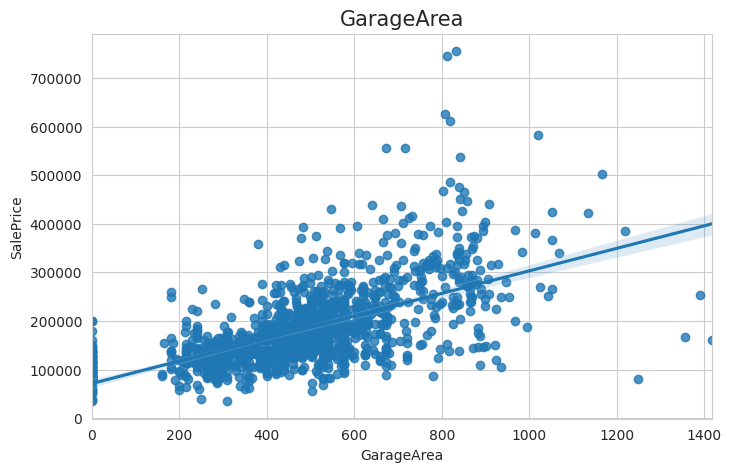

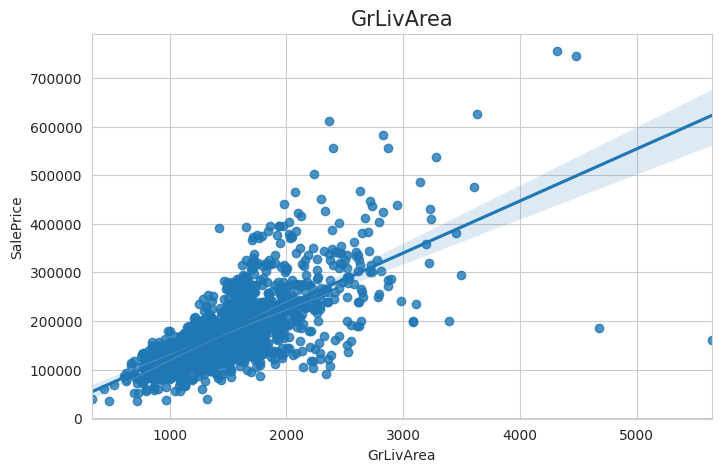

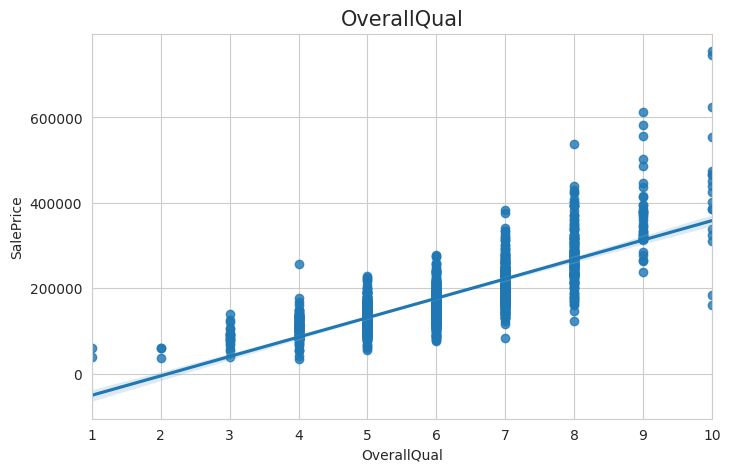

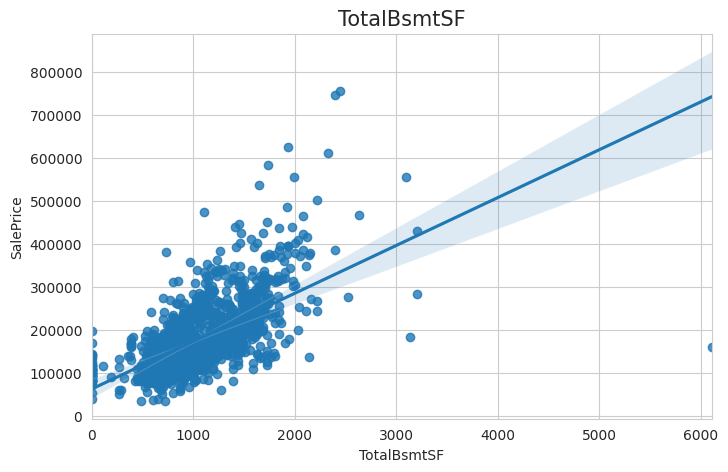

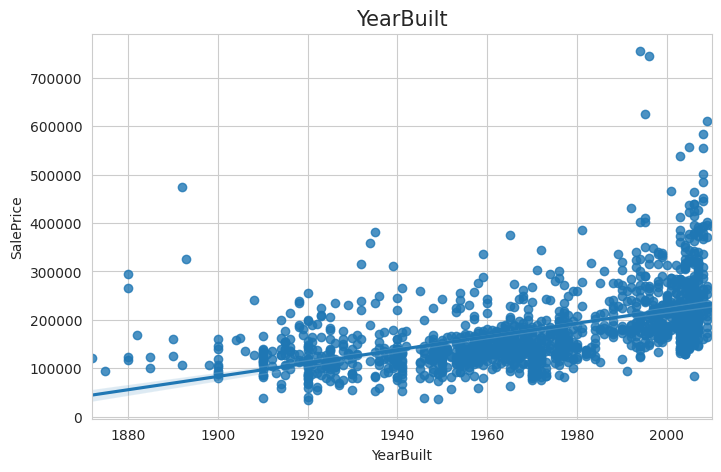

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_numerical(df_eda, col, target_var):

    plt.figure(figsize=(8,5))
    sns.regplot(data=df_eda, x=col, y=target_var)
    plt.title(f"{col}", fontsize=15)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

### Findings

* Correlation analysis of strong influence (gradient of lines)
* Correlations of Moderation influence (gradient of lines)